 
---

# **Fontes e documentos de apoio**
* Brasil Covid-19: https://brasil.io/api/dataset/covid19/
* Google Mobility Report: https://www.google.com/covid19/mobility/index.html?hl=en
  *   https://www.gstatic.com/covid19/mobility/2020-05-29_BR_Mobility_Report_en.pdf




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---


# **Leitura dos datasets e análise exploratória inicial**

In [2]:
covid = pd.read_csv('covid19-BR.csv')
mob = pd.read_csv('Global_Mobility_Report.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Dataset de mobilidade - Google:**
 * Filtrando dataset para o Brasil

In [0]:
mobbr = mob[mob['country_region_code'] == 'BR']

* Entendendo o formato e dados básicos do dataset com .head() e .describe()

In [4]:
mobbr.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
12791,BR,Brazil,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
12792,BR,Brazil,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
12793,BR,Brazil,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
12794,BR,Brazil,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
12795,BR,Brazil,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In [5]:
mobbr.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000
mean,-39.216407,-10.065064,-34.498586,-38.225601,-19.774399,10.933522
std,26.785154,14.397854,27.170836,27.668103,23.508107,7.768209
min,-87.000000,-83.000000,-91.000000,-89.000000,-76.000000,-4.000000
25%,-62.000000,-20.000000,-54.000000,-60.000000,-37.000000,3.000000
50%,-48.000000,-9.000000,-39.000000,-48.000000,-24.000000,13.000000
75%,-9.000000,2.000000,-18.000000,-10.000000,1.000000,17.000000
max,21.000000,24.000000,147.000000,25.000000,28.000000,30.000000


* Entendendo e avaliando os dados quanto ao conceito de variaçao de baseline e sua distribuição - Comparaçao entre SC e AM

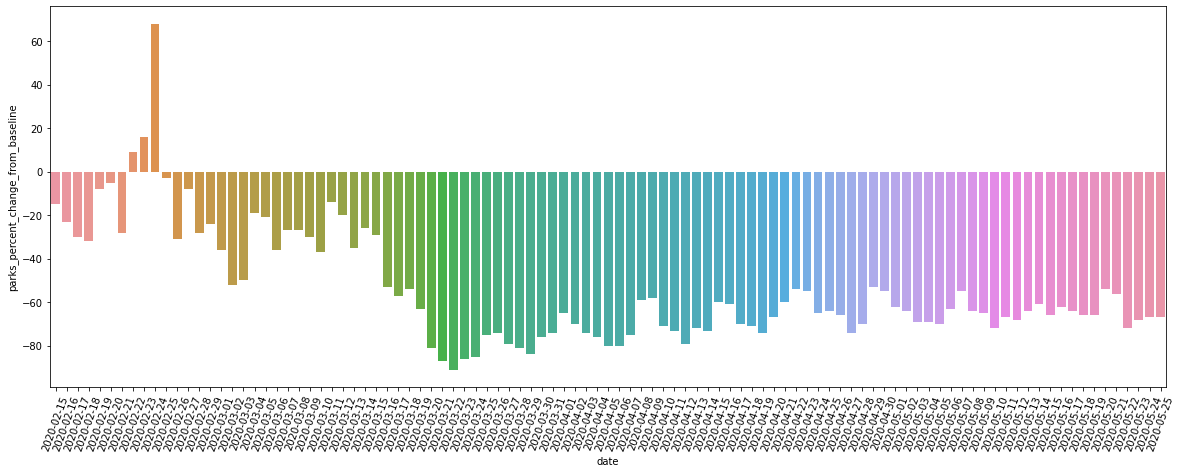

In [6]:
plt.figure(figsize=(20,7))
p = sns.barplot(x= 'date', y='parks_percent_change_from_baseline', data=mobbr[mobbr['sub_region_1'] == 'State of Santa Catarina'])
lab = p.set_xticklabels(p.get_xticklabels(), rotation=70)

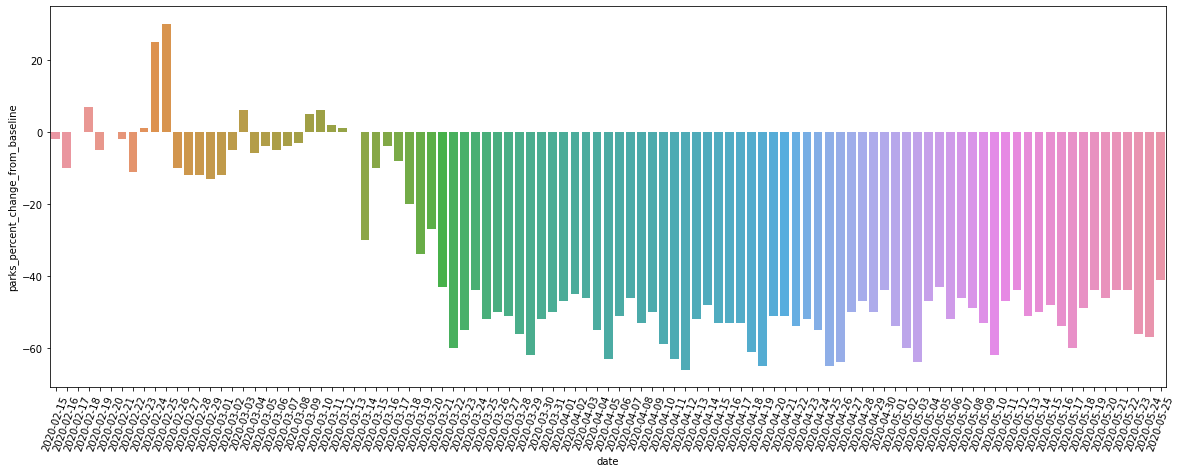

In [7]:
plt.figure(figsize=(20,7))
p = sns.barplot(x= 'date', y='parks_percent_change_from_baseline', data=mobbr[mobbr['sub_region_1'] == 'State of Amazonas'])
lab = p.set_xticklabels(p.get_xticklabels(), rotation=70)

**Dataset Covid-19 Brasil.Io**
 * Entendendo o formato e dados básicos do dataset com .head() e .describe()
 * filtro básico por estado (coluna *place_type*)


In [8]:
covid.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,23,2020-06-01,65,AC,Acrelândia,1200013.0,city,158,1035.65810,0,1,0,0.0063,15256.0,True,False
1,23,2020-06-01,32,AC,Assis Brasil,1200054.0,city,28,377.51112,1,2,0,0.0714,7417.0,True,False
2,23,2020-06-01,24,AC,Brasiléia,1200104.0,city,38,144.60766,1,2,0,0.0526,26278.0,True,False
3,23,2020-06-01,55,AC,Bujari,1200138.0,city,49,477.30372,0,2,0,0.0408,10266.0,True,False
4,23,2020-06-01,25,AC,Capixaba,1200179.0,city,40,340.91878,0,1,0,0.0250,11733.0,True,False


In [9]:
covid.describe()

,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019
count,149829.000000,149829.000000,1.486270e+05,149829.000000,144778.000000,149829.000000,149829.000000,149829.000000,149829.000000,1.486270e+05
mean,19.478846,23.670758,3.092410e+06,128.438593,68.563896,7.047554,8.128580,0.400336,0.067812,2.042682e+05
std,2.472858,17.142371,1.038545e+06,1576.748061,160.984997,83.712870,121.678511,5.516742,0.179507,1.585464e+06
min,9.000000,1.000000,1.100000e+01,0.000000,0.002180,-1289.000000,0.000000,-82.000000,0.000000,1.112000e+03
25%,18.000000,10.000000,2.402600e+06,1.000000,8.368200,0.000000,0.000000,0.000000,0.000000,1.101900e+04
50%,20.000000,20.000000,3.133105e+06,4.000000,21.886630,0.000000,0.000000,0.000000,0.000000,2.313600e+04
75%,21.000000,35.000000,3.557105e+06,18.000000,63.381400,1.000000,1.000000,0.000000,0.048900,5.674600e+04
max,23.000000,98.000000,5.300108e+06,111296.000000,14148.174240,9427.000000,7667.000000,386.000000,1.000000,4.591905e+07


In [0]:
covid['place_type'].value_counts()
covidstate =  covid[covid['place_type'] == 'state']

* Visualizando a distribuiçao dos dados de casos confirmados - comparação entre SC e AM
  * Explicaçao para a subtraçao de novos casos ocorrida no dia 01/05 (http://www.coronavirus.sc.gov.br/wp-content/uploads/2020/05/boletim-epidemiologico-01-05-2020.pdf)

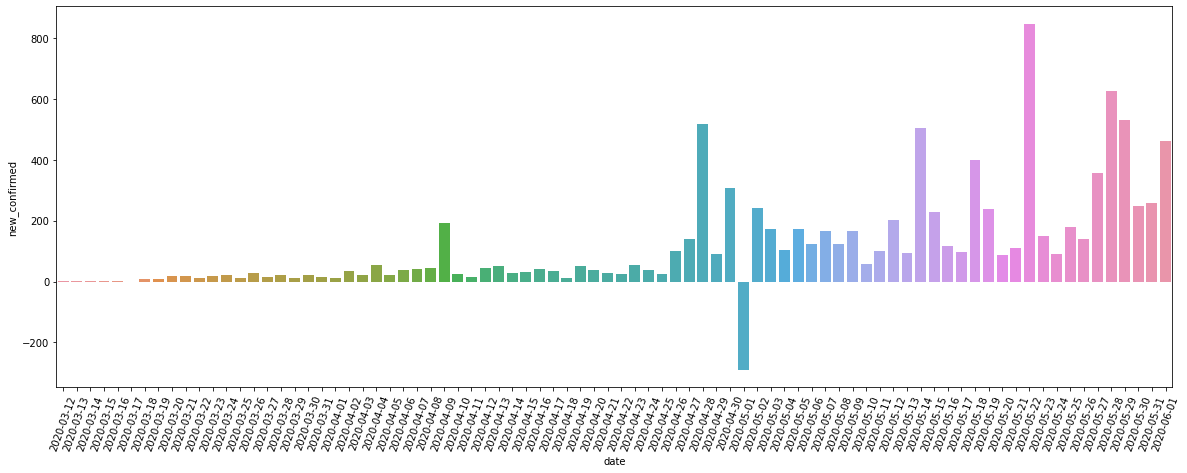

In [11]:
plt.figure(figsize=(20,7))
p = sns.barplot(x= 'date', y='new_confirmed', data=covidstate[covidstate['state']=='SC'].sort_values('date'))
lab = p.set_xticklabels(p.get_xticklabels(), rotation=70)

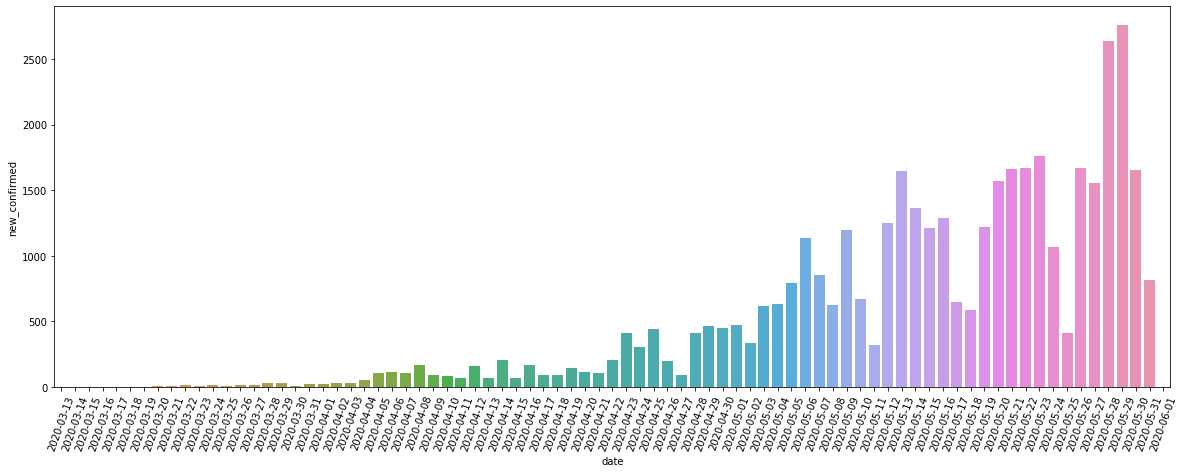

In [12]:
plt.figure(figsize=(20,7))
p = sns.barplot(x= 'date', y='new_confirmed', data=covidstate[covidstate['state']=='AM'].sort_values('date'))
lab = p.set_xticklabels(p.get_xticklabels(), rotation=70)

Visualização lado a lado de dados de ambos os datasets (Distribuiçao dos casos por dia e possivel correlação) - Estados SC e AM

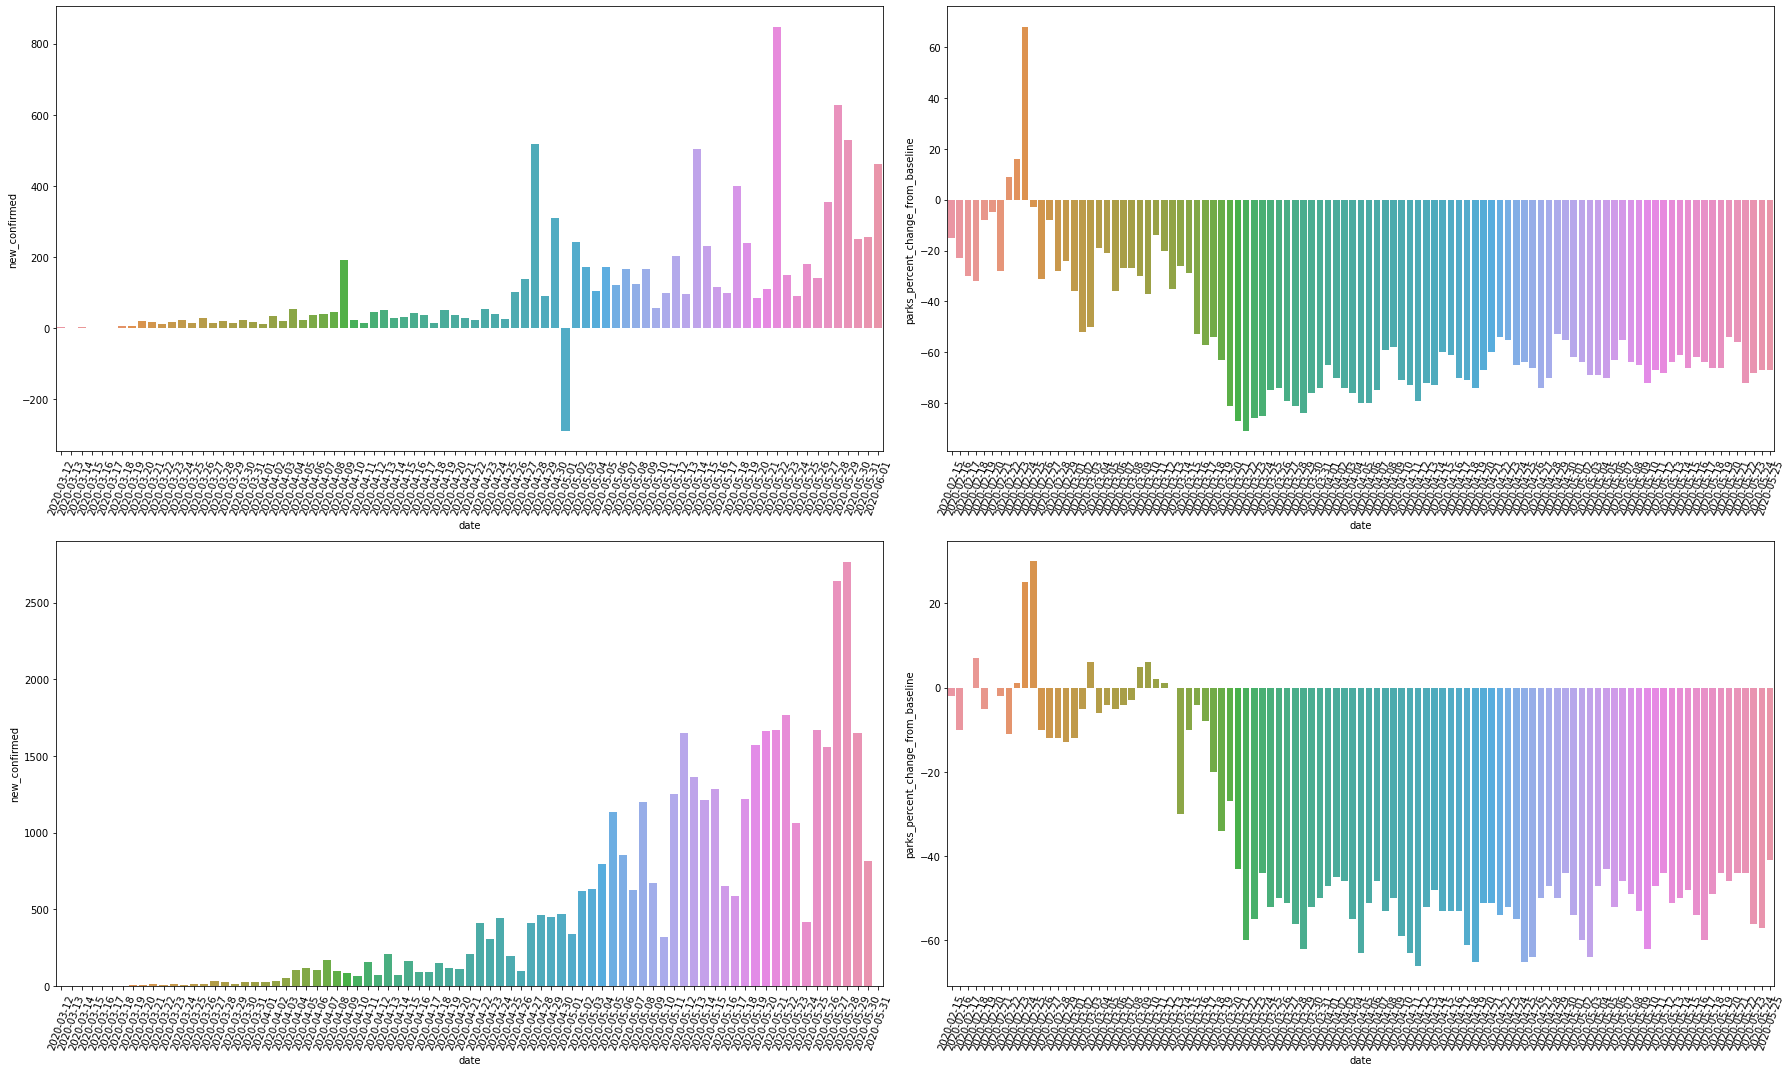

In [13]:
fig, ax =plt.subplots(2,2)
fig.set_size_inches(25,15)

sc1 = sns.barplot(x= 'date', y='new_confirmed', data=covidstate[covidstate['state']=='SC'].sort_values('date'), ax=ax[0,0])
sc2 = sns.barplot(x= 'date', y='parks_percent_change_from_baseline', data=mobbr[mobbr['sub_region_1'] == 'State of Santa Catarina'], ax=ax[0,1])
l = sc1.set_xticklabels(sc1.get_xticklabels(), rotation=70)
l = sc2.set_xticklabels(sc2.get_xticklabels(), rotation=70)

am1 = sns.barplot(x= 'date', y='new_confirmed', data=covidstate[covidstate['state']=='AM'].sort_values('date'), ax=ax[1,0])
am2 = sns.barplot(x= 'date', y='parks_percent_change_from_baseline', data=mobbr[mobbr['sub_region_1'] == 'State of Amazonas'], ax=ax[1,1])
l = am1.set_xticklabels(sc1.get_xticklabels(), rotation=70)
l = am2.set_xticklabels(sc2.get_xticklabels(), rotation=70)

fig.tight_layout()

Avaliando a necessidade de reindex para coluna de data (maior controle na apresentaçao de dados na serie temporal e posivelmente no merge join)

In [0]:
nmob = mobbr.set_index(pd.to_datetime(mobbr['date']))

In [15]:
nmob.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,
2020-02-15,BR,Brazil,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,BR,Brazil,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,BR,Brazil,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,BR,Brazil,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,BR,Brazil,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0


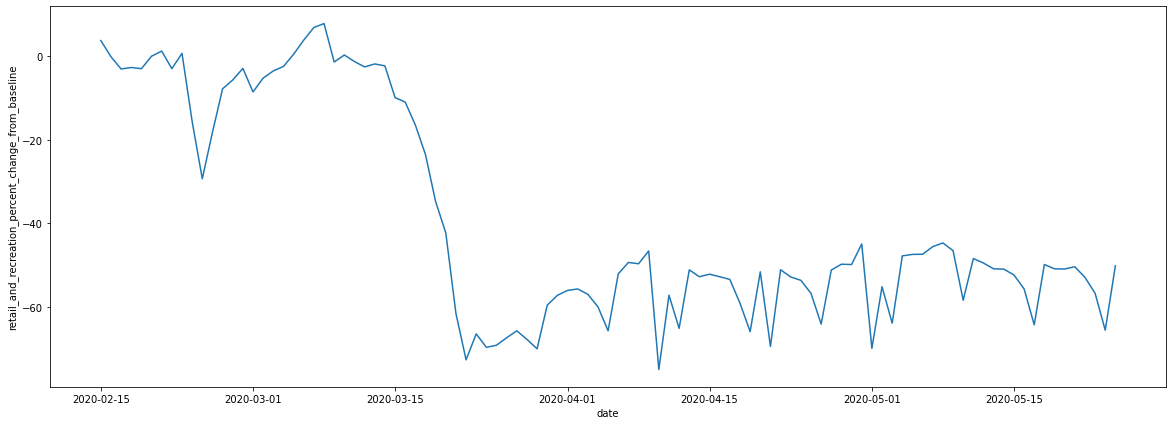

In [16]:
plt.figure(figsize=(20,7))
p = sns.lineplot(x = nmob.groupby(by= ['date'], level=0).mean().index, y= 'retail_and_recreation_percent_change_from_baseline', data = nmob.groupby(by= ['date'], level=0).mean(), legend=False)
#l = p.set_xticklabels(p.get_xticklabels(), rotation=70)



---

# **Pré-processamento para merge (join) - Mobilidade e Covid**

Limpeza de dados e Feature engineering 

Tratando coluna de Sub Região, preparando para o join com a tabela de dados de Covid-19
* Retirar prefixo 'State Of'
* Controlar dados do DF
* Gerar a Sigla do estado para seguir o join

In [17]:
mobbr['state_full'] = mobbr['sub_region_1'].str.replace('State of ', '' )
mobbr['state_full'] = mobbr['state_full'].str.replace('Federal District', 'Distrito Federal' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Criação de um  mapper através de uma tabela HTML (scrap) e utilização dessa tabela para converter o estado para siglas

In [0]:
#mapper = pd.DataFrame({'Name': mobbr['state_full'].value_counts().index.sort_values(), 'Cod': ''})
scrap = pd.read_html('https://www.todamateria.com.br/siglas-estados-brasileiros/')
mapper = pd.DataFrame(scrap[0]).drop('Observação', axis=1)
mapper.rename(columns={'Sigla':'state'}, inplace=True)
nmob = mobbr.merge(mapper, left_on='state_full', right_on='Estado do Brasil').drop('Estado do Brasil', axis=1)

Avaliação das siglas para join com tabela de covid na sequência

In [19]:
nmob['state'].value_counts()

DF    101
MT    101
AP    101
AC    101
RR    101
TO    101
CE    101
SE    101
MS    101
MA    101
BA    101
GO    101
PI    101
AM    101
SP    101
RJ    101
PA    101
RO    101
PR    101
RN    101
PE    101
PB    101
AL    101
SC    101
MG    101
RS    101
ES    101
Name: state, dtype: int64

In [20]:
covidstate.groupby('state').sum()['new_confirmed'].sort_values(ascending=False)

state
SP    111296
RJ     54530
CE     50504
AM     41378
PA     40014
MA     36625
PE     34900
BA     18898
PB     13695
ES     13690
AL     10837
MG     10670
AP      9890
DF      9780
SC      9498
RS      9496
RN      8008
SE      7233
AC      6326
PI      5119
RO      4942
PR      4900
TO      4345
GO      4017
RR      3474
MT      2636
MS      1489
Name: new_confirmed, dtype: int64


**Join entre as tabelas tratadas de mobilidade Google (nmob) e Covid-19 do Brasil (covidstate)** - Left outer join para manter a série de datas relacionadas ao baseline de mobilidade (importante para análise de correlação e posterior forecast)

In [0]:
result = pd.merge(left= nmob, right= covidstate, how='left', on=['state', 'date'])

Avaliação de integridade pós join - distribuiçao básica de casos,  baseline e .head()

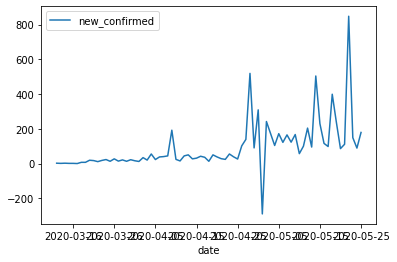

In [22]:
result[result['state']=='SC'].plot(x= 'date', y= 'new_confirmed')

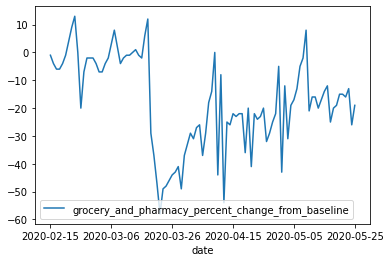

In [23]:
result[result['state']=='SC'].plot(x= 'date', y= 'grocery_and_pharmacy_percent_change_from_baseline')

In [24]:
result.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,state_full,state,epidemiological_week,order_for_place,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,BR,Brazil,Federal District,NaN,2020-02-15,10.0,7.0,-8.0,8.0,8.0,0.0,Distrito Federal,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BR,Brazil,Federal District,NaN,2020-02-16,11.0,6.0,-10.0,4.0,0.0,2.0,Distrito Federal,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BR,Brazil,Federal District,NaN,2020-02-17,2.0,4.0,-1.0,11.0,22.0,-2.0,Distrito Federal,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BR,Brazil,Federal District,NaN,2020-02-18,1.0,4.0,2.0,14.0,22.0,-2.0,Distrito Federal,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BR,Brazil,Federal District,NaN,2020-02-19,-2.0,0.0,-3.0,9.0,20.0,-2.0,Distrito Federal,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores nulos para colunas de casos pós join - Preenchendo com 0

In [0]:
result['new_deaths'].fillna(0, inplace=True)
result['new_confirmed'].fillna(0, inplace=True)



---


# **Análise de correlações - Brasil**

Perguntas a serem respondidas:
* Existe alguma variável (ou combinação) nos dados de mobilidade que "explique" o numero de casos e óbitos?

Análise de tipo de features não correlacionáveis

In [26]:
result.select_dtypes(exclude='number').columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'state_full', 'state', 'city', 'place_type', 'is_last',
       'is_repeated'],
      dtype='object')

Limpeza de dados nao importantes ou "prejudiciais" (repetidos) e criaçao da tabela para analise de correlação (corr)

In [0]:
corr = result.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',       
       'epidemiological_week', 'order_for_place', 'city', 'city_ibge_code',
       'place_type', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 
       'last_available_deaths', 'last_available_death_rate',
       'estimated_population_2019', 'is_last', 'is_repeated'], axis= 1)

Rename de colunas para melhor visualização do grafico de correlação

In [0]:
corr.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail',
       'grocery_and_pharmacy_percent_change_from_baseline': 'groc_pharm',
       'parks_percent_change_from_baseline': 'parks',
       'transit_stations_percent_change_from_baseline': 'transit_sta',
       'workplaces_percent_change_from_baseline': 'work',
       'residential_percent_change_from_baseline': 'resid'}, inplace = True)

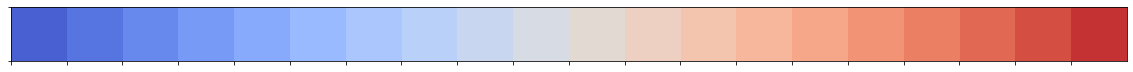

In [29]:
sns.palplot(sns.color_palette("coolwarm", 20)) #'2020-02-15' <-> '2020-05-25'

2020-02-15 <----------------------------------------------------------------------------------------> 2020-05-25


Gráfico de correlações genérico com 3 dimensões (Dimensão de tempo representada na escala acima - '2020-02-15' <-> '2020-05-25')

**OBS:** O tempo de execução desse gráfico fica próximo aos 7 minutos no ambiente Colab do google.

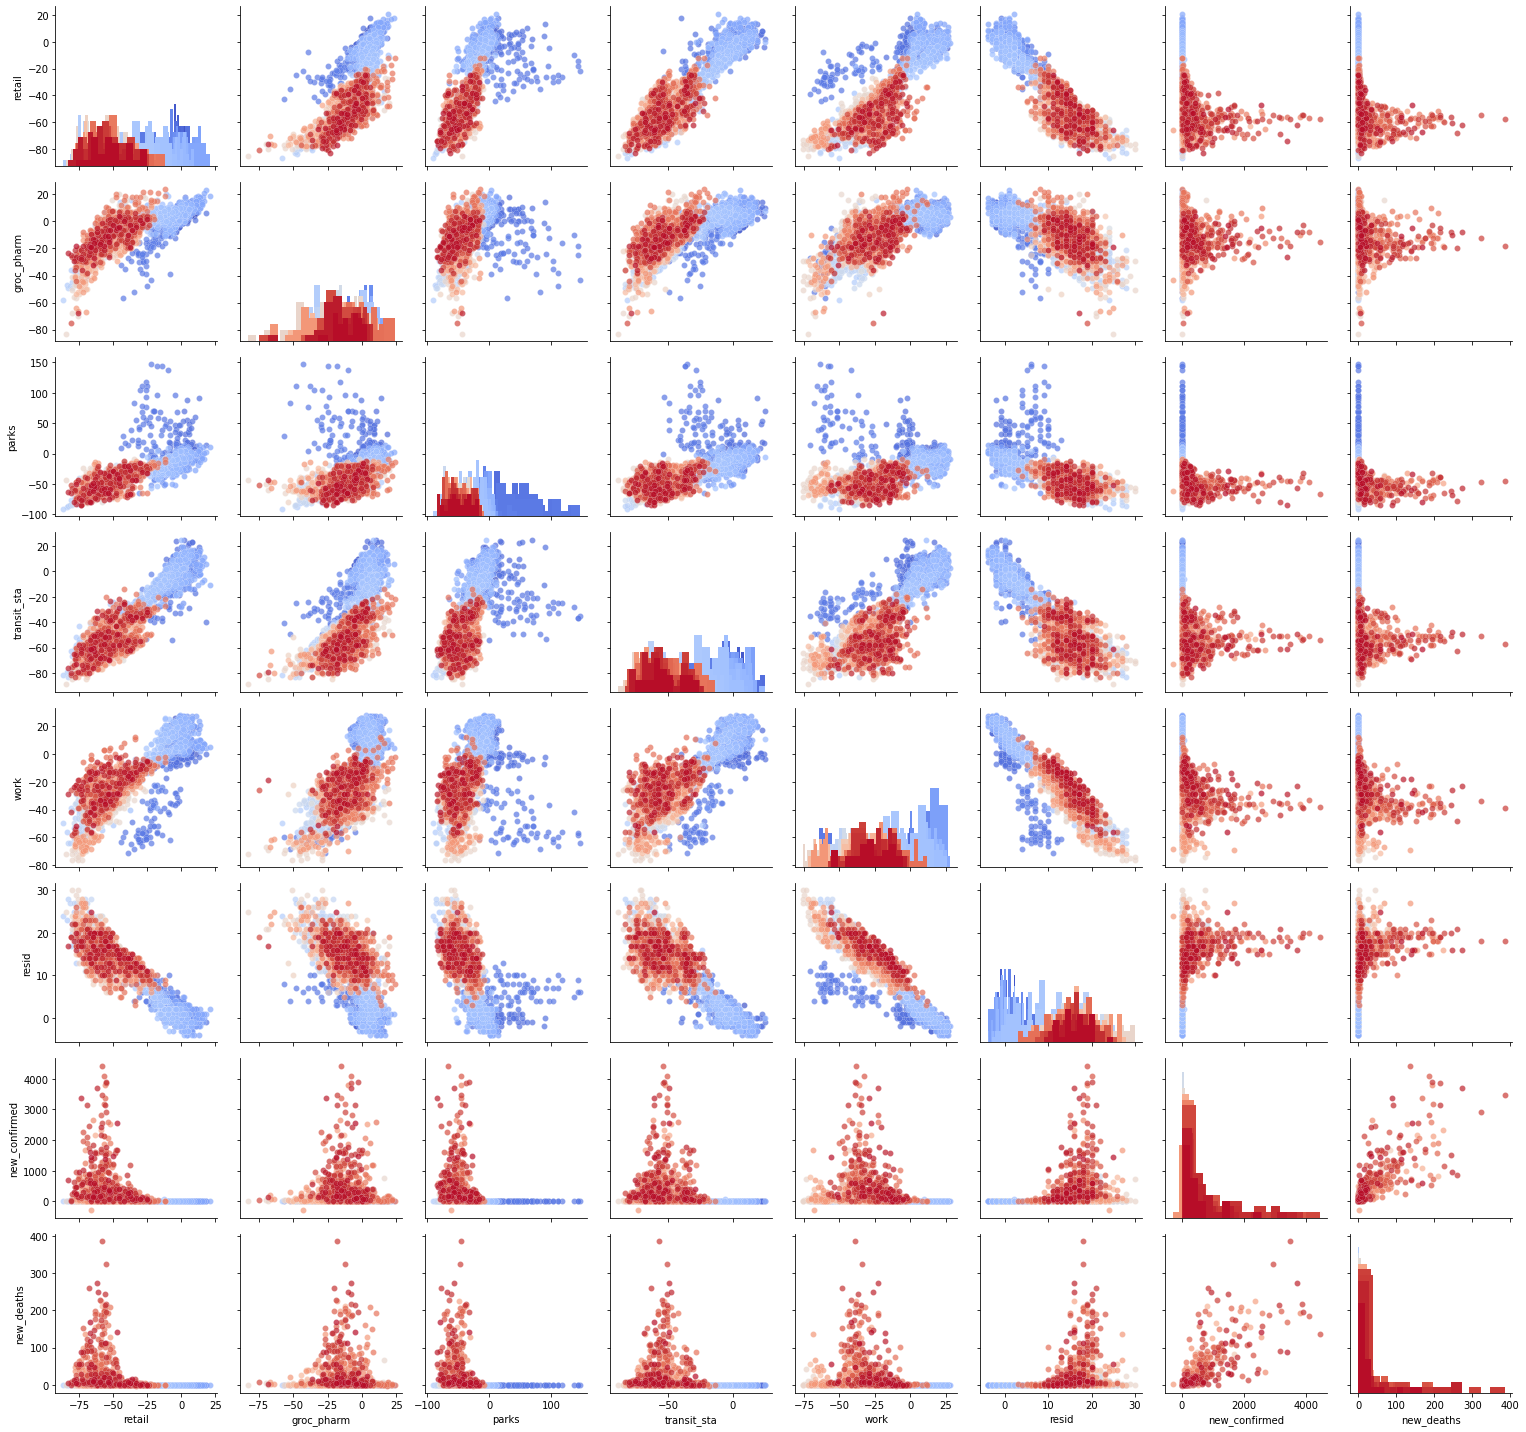

In [64]:
p = sns.pairplot(data=corr, hue ='date', palette= "coolwarm", diag_kind='hist', plot_kws=dict(edgecolor="white", linewidth=0.2, alpha=0.7))
p._legend.remove()
plt.tight_layout()

Esses outliers são dados válidos? 4000 novos casos e 400 mortes num único dia pra um único estado?

In [31]:
corr.describe()

,retail,groc_pharm,parks,transit_sta,work,resid,new_confirmed,new_deaths
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,-39.186652,-10.106711,-34.384672,-38.352402,-19.727539,10.902824,138.921525,8.650532
std,26.801080,14.450613,27.228076,27.702528,23.523630,7.752671,387.391999,28.677566
min,-87.000000,-83.000000,-91.000000,-89.000000,-76.000000,-4.000000,-290.000000,-2.000000
25%,-62.000000,-20.000000,-54.000000,-61.000000,-37.000000,3.000000,0.000000,0.000000
50%,-48.000000,-9.000000,-38.000000,-48.000000,-23.000000,13.000000,10.000000,0.000000
75%,-9.000000,1.500000,-18.000000,-10.000000,1.000000,17.000000,95.000000,3.000000
max,21.000000,24.000000,147.000000,25.000000,28.000000,30.000000,4427.000000,386.000000


Infelizmente são dados válidos.

In [32]:
corr[corr['new_confirmed'] > 1000].sort_values(by= 'new_confirmed')

,date,retail,groc_pharm,parks,transit_sta,work,resid,state_full,state,new_confirmed,new_deaths
1714,2020-05-23,-72.0,-28.0,-68.0,-58.0,-33.0,18.0,Pernambuco,PE,1026.0,87.0
2477,2020-04-08,-56.0,-4.0,-48.0,-54.0,-45.0,20.0,São Paulo,SP,1026.0,57.0
2509,2020-05-10,-60.0,-2.0,-56.0,-46.0,-7.0,10.0,São Paulo,SP,1033.0,101.0
2487,2020-04-18,-65.0,-14.0,-56.0,-51.0,-31.0,16.0,São Paulo,SP,1053.0,63.0
503,2020-05-24,-58.0,-1.0,-57.0,-34.0,-12.0,10.0,Amazonas,AM,1065.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
2505,2020-05-06,-56.0,-10.0,-45.0,-52.0,-36.0,19.0,São Paulo,SP,3800.0,194.0
2519,2020-05-20,-55.0,-8.0,-38.0,-54.0,-38.0,19.0,São Paulo,SP,3864.0,216.0
2520,2020-05-21,-55.0,-3.0,-32.0,-53.0,-39.0,20.0,São Paulo,SP,3880.0,195.0
2514,2020-05-15,-57.0,-8.0,-46.0,-51.0,-33.0,20.0,São Paulo,SP,4092.0,186.0


Observação mais detalhada da correlação entre o uso de parques e recreação, numero de casos e tempo para todo o Brasil.

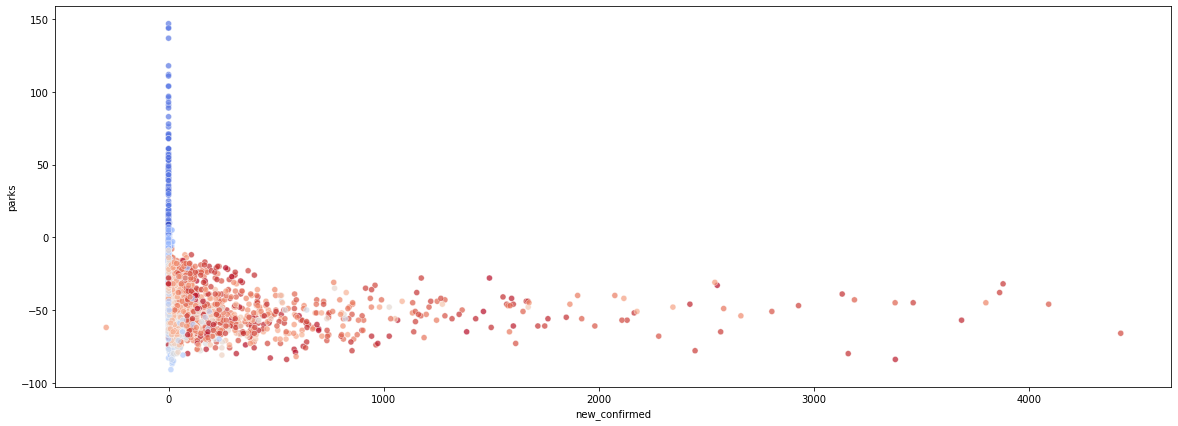

In [33]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='new_confirmed', y='parks', data= corr, hue='date', palette="coolwarm", alpha=0.7,linewidth=0.5, legend=False)

Aumento de 150% no baseline para parques? onde foi isso?

In [34]:
corr[corr['parks'] > 110].sort_values(by= 'parks')

,date,retail,groc_pharm,parks,transit_sta,work,resid,state_full,state,new_confirmed,new_deaths
1928,2020-02-24,-25.0,-48.0,111.0,-25.0,-60.0,7.0,Rio Grande do Norte,RN,0.0,0.0
1828,2020-02-25,-29.0,-38.0,112.0,-33.0,-66.0,10.0,Rio de Janeiro,RJ,0.0,0.0
1625,2020-02-24,-26.0,-16.0,118.0,-25.0,-56.0,9.0,Pernambuco,PE,0.0,0.0
2635,2020-02-24,-10.0,-10.0,137.0,-28.0,-42.0,5.0,Tocantins,TO,0.0,0.0
716,2020-02-24,-14.0,-18.0,144.0,-37.0,-58.0,9.0,Espírito Santo,ES,0.0,0.0
2232,2020-02-25,-18.0,-25.0,144.0,-37.0,-57.0,6.0,Roraima,RR,0.0,0.0
717,2020-02-25,-22.0,-43.0,147.0,-35.0,-64.0,6.0,Espírito Santo,ES,0.0,0.0


Segunda e terça de carnaval, faz sentido :)

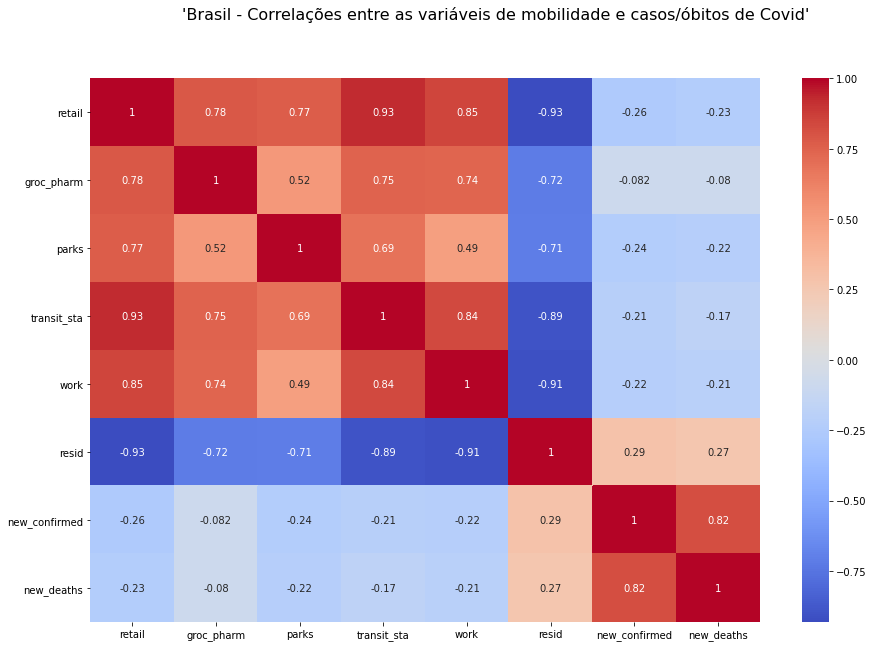

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
x = plt.suptitle("'Brasil - Correlações entre as variáveis de mobilidade e casos/óbitos de Covid'", fontsize=16)

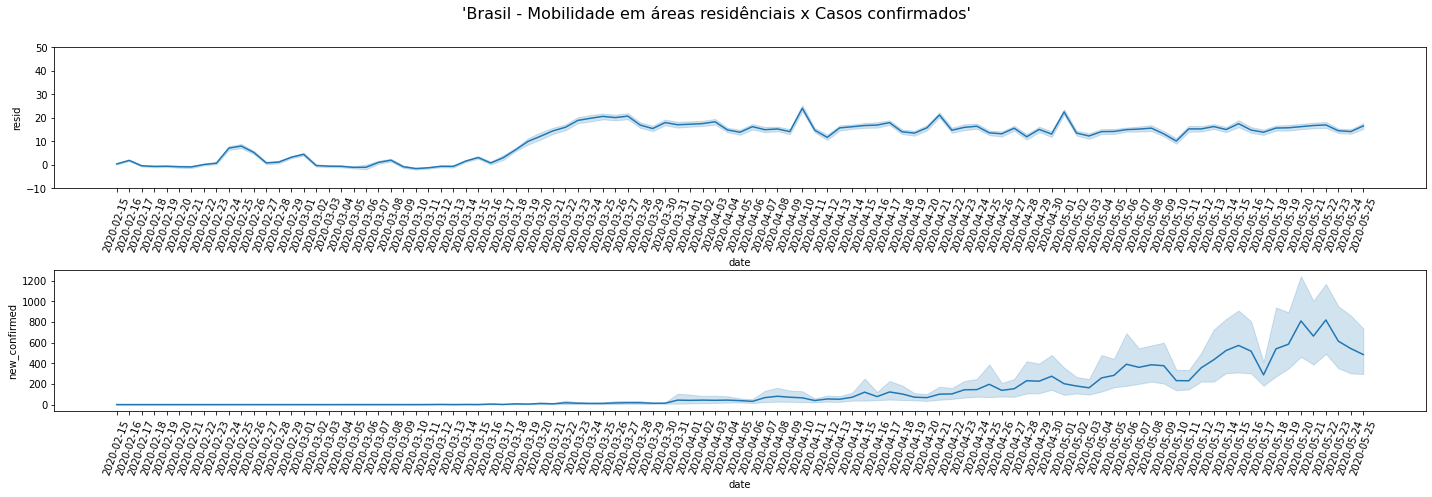

In [36]:
fig, ax =plt.subplots(2,1)
fig.set_size_inches(20,7)
p = sns.lineplot(x='date', y='resid', data=corr, ax=ax[0])
ax[0].set_ylim(-10, 50)
sns.lineplot(x='date', y='new_confirmed', data=corr, ax=ax[1])
x = ax[1].set_xticklabels(labels=corr['date'].unique(), rotation=70)
x = ax[0].set_xticklabels(labels=corr['date'].unique(), rotation=70)

fig.tight_layout()
fig.suptitle("'Brasil - Mobilidade em áreas residênciais x Casos confirmados'", fontsize=16)
fig.subplots_adjust(top=0.9)

Analisando os gráficos de correlações acima para dados de todo o Brasil (Pairplot e Heatmap), observamos as altas correlações esperadas entre si, tanto para os dados de mobilidade e os dados de casos e vítimas do covid. 

Entre ambos os datasets, percebemos uma fraca relação negativa (inversa), de certa forma contra-intuitiva (menos pessoas no comércio, maior numero de casos e mortes, por exemplo). Porém, essa correlação pode ser explicada devido ao aumento do número de casos e mortes junto da implantação de políticas de lockdown, fazendo com que exista correlações negativas com variáveis associadas à ambientes externos, e positiva quando relacionada à váriavel de mobilidade em áreas residênciais. 

A série temporal é naturalmente correlacionada com ambos os datasets (observada no pairplot) devido às caracteristicas epidemiológicas da doença e as políticas de lockdown aplicadas pelos governos. É possível que possa existir alguma correlação maior ou menor entre os datasets para diferentes estados. Vamos tentar avaliar isso na sequência.



---


# **Ánalise de correlações para diferentes estados**

In [0]:
sc = corr[corr['state']=='SC']
rs = corr[corr['state']=='RS']
sp = corr[corr['state']=='SP']
ms = corr[corr['state']=='MS']

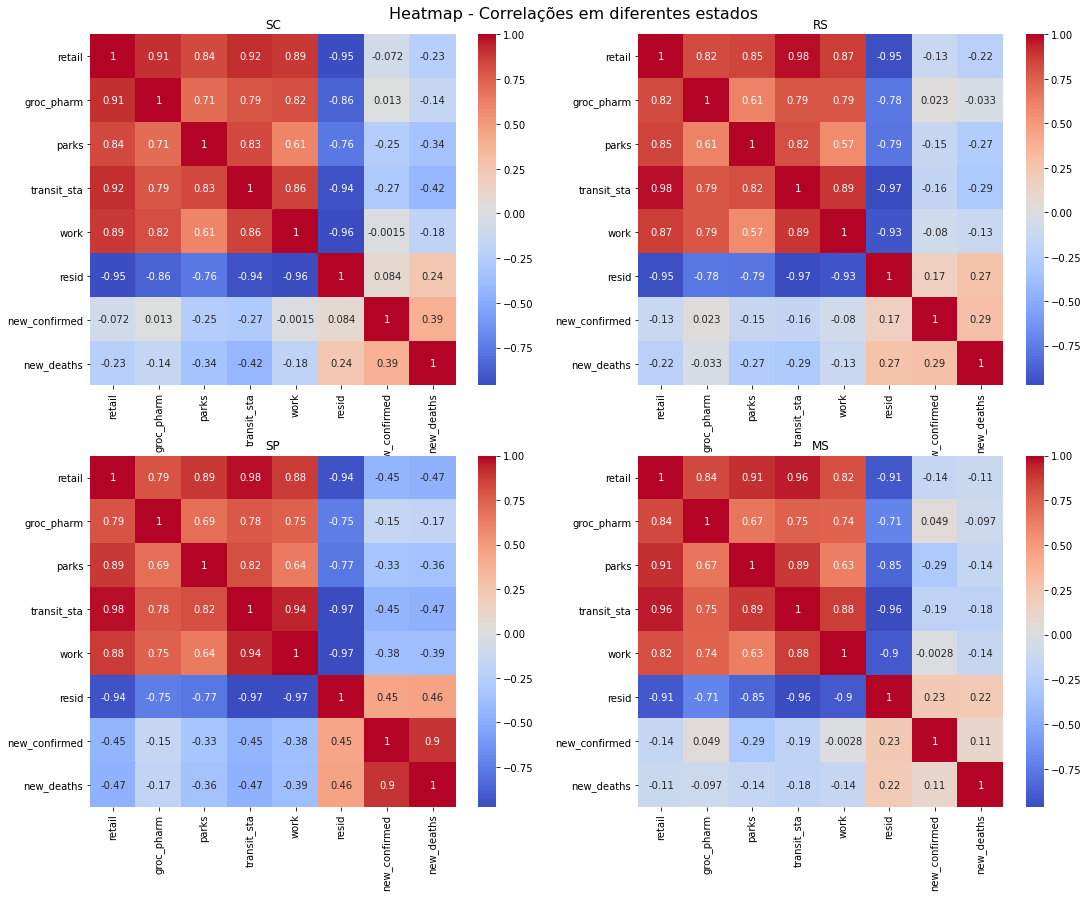

In [38]:
fig, ax =plt.subplots(2,2)
fig.set_size_inches(18,13)

schm = sns.heatmap(sc.corr(), annot=True, cmap='coolwarm', ax=ax[0,0])
rshm = sns.heatmap(rs.corr(), annot=True, cmap='coolwarm', ax=ax[0,1])
sphm = sns.heatmap(sp.corr(), annot=True, cmap='coolwarm', ax=ax[1,0])
mshm = sns.heatmap(ms.corr(), annot=True, cmap='coolwarm', ax=ax[1,1])

ax[0,0].title.set_text('SC')
ax[0,1].title.set_text('RS')
ax[1,0].title.set_text('SP')
ax[1,1].title.set_text('MS')

x = fig.suptitle('Heatmap - Correlações em diferentes estados ', fontsize=16)
fig.subplots_adjust(top=0.95)

Aqui podemos perceber diferenças mais claras nas correlações entre diferentes estados.

**SC:** Com um lockdown mais precoçe e agressivo e uma flexibilização também precoçe quando comparado a outros estados, SC tem pequenas correlações negativas entre os dados de mobilidade e casos, pricipalmente para os valores de terminais de transporte e parques, que tiveram uma diminuição bastante expressiva quando comparada com o baseline. A quantidade de mortes é bastante pequena, isso faz com que a correlação negativa com os dados de mobilidade seja exacerbada (o aumento no número de mortes veio junto com a diminuiçao do uso dos terminais de transporte, por exemplo).


**RS:** Assim como SC, possui poucos casos e óbitos no total, e um desenho de correlações bastante similar. A diferenca nas correlações das áreas de terminais de transporte e parques é visível devido a diferença dos índices de mobilidade nessas variáveis.

**SP:** Com o dobro de casos do segundo estado no ranking, um índice demográfico bastante elevado e único no país, SP possui características bastante específicas, criando correlações bem pouco intuitivas entre os dados de mobilidade e casos de Covid. A sazonalidade semanal é especialmente notada no grafico de report de casos , onde não é observado o report de casos durante os finais de semana, esse fenômeno influência especialmente às correlações relacionadas a terminais de transporte, áreas de compras e residênciais. Novamente as correlações podem ser explicadas devido às políticas de lockdown e o aumento do número de casos e óbitos durante a série temporal, os altíssimos números absolutos do estado fazem com que essas correlações seja especialmente altas.

**MS:** Mato Grosso do Sul possui o menor número de casos e óbitos no Brasil. Apesar desse menor número absoluto as correlações entre os datasets se mantêm praticamente as mesmas. 


**Considerações:** 
* Os boletins de casos são esporádicos, com picos altos e grandes vales. Essa distribuição irregular dificulta a criação de correlações com os dados de mobilidade, cuja distribuição é de certa forma uniforme durante a série temporal.
* As caracteristicas epidemiológicas do covid-19 (janela de aparecimento de sintomas e detecção do vírus no organismo entre outras) e características técnicas dos métodos de detecção de casos e notificação (subnotificaçao, falta de testagem massiva, aplicação de testes somente em determinados cenários entre outros fatores) fazem com que a correlação entre os dados de mobilidade (linha temporal bastante precisa) e os dados de casos de covid (linha temporal bastante imprecisa) dificulte a aplicaçao desses componentes em análises de previsão, por exemplo, uma pessoa infectada num parque ou shopping num domingo só vai poder aparecer como caso confirmado no mínimo 4 dias depois, na quarta-feira.
* Outro fator a ser considerado é o fato de que pequenas correlações entre os datasets estão sendo, de certa forma, mascaradas pela pesada correlação "natural" entre o início dos casos e a aplicação de políticas de lockdown. Para percebemos melhor essas "pequenas" interações entre mobilidade e casos, seria necessário atribuir uma data de corte para que as correlações possam ser desenhadas (data do primeiro caso ou óbito) e recaulcular as correlações.


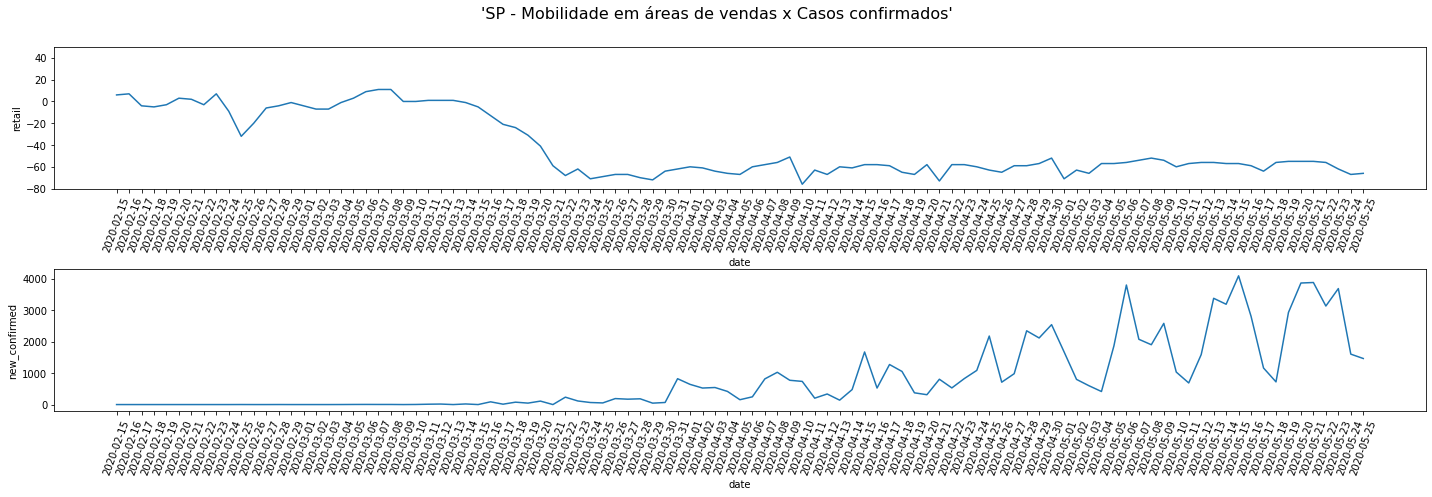

In [39]:
fig, ax =plt.subplots(2,1)
fig.set_size_inches(20,7)
sns.lineplot(x='date', y='retail', data=sp, ax=ax[0])
ax[0].set_ylim(-80, 50)
sns.lineplot(x='date', y='new_confirmed', data=sp, ax=ax[1])
x = ax[1].set_xticklabels(labels=corr['date'].unique(), rotation=70)
y = ax[0].set_xticklabels(labels=corr['date'].unique(), rotation=70)

fig.tight_layout()
fig.suptitle("'SP - Mobilidade em áreas de vendas x Casos confirmados'", fontsize=16)
fig.subplots_adjust(top=0.9)

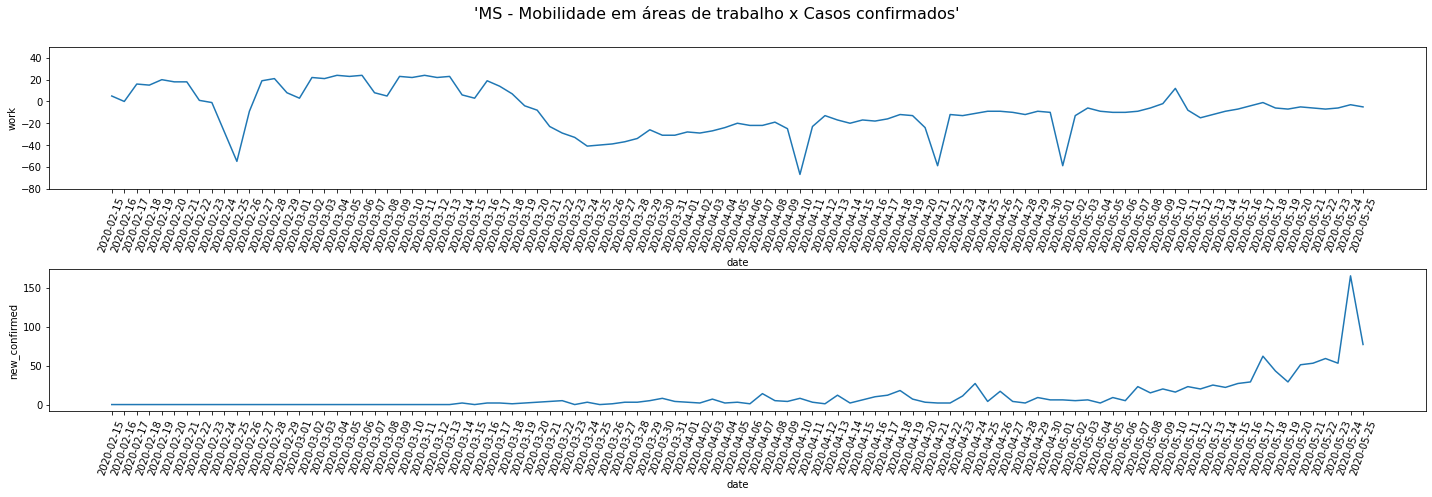

In [40]:
fig, ax =plt.subplots(2,1)
fig.set_size_inches(20,7)
p = sns.lineplot(x='date', y='work', data=ms, ax=ax[0])
ax[0].set_ylim(-80, 50)
sns.lineplot(x='date', y='new_confirmed', data=ms, ax=ax[1])
x = ax[1].set_xticklabels(labels=corr['date'].unique(), rotation=70)
y = ax[0].set_xticklabels(labels=corr['date'].unique(), rotation=70)

fig.tight_layout()
fig.suptitle("'MS - Mobilidade em áreas de trabalho x Casos confirmados'", fontsize=16)
fig.subplots_adjust(top=0.9)

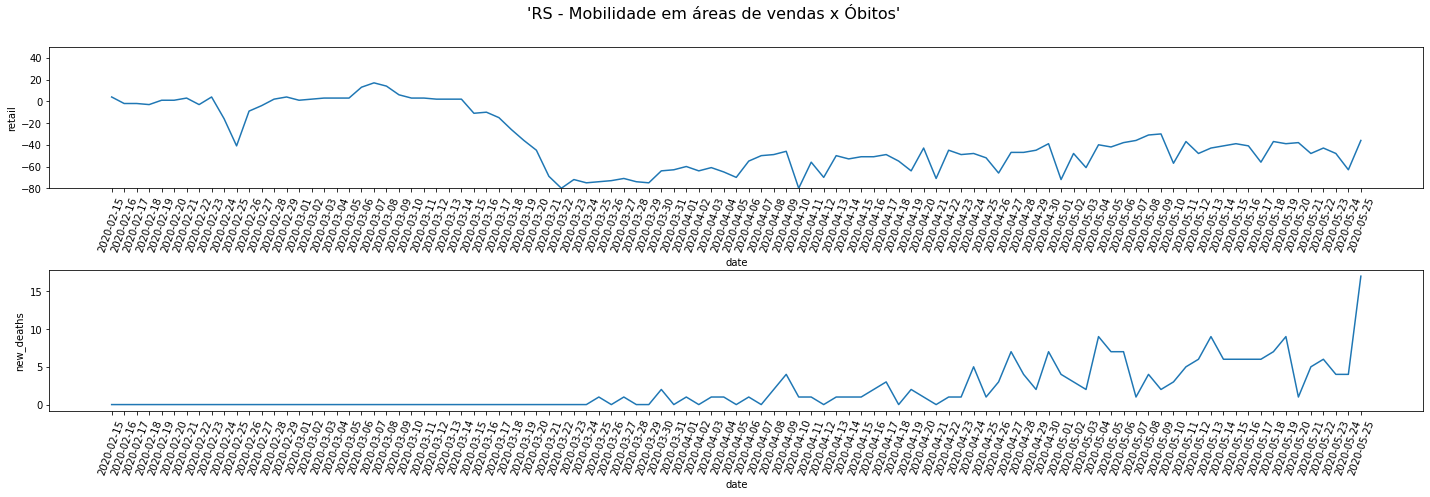

In [41]:
fig, ax =plt.subplots(2,1)
fig.set_size_inches(20,7)
p = sns.lineplot(x='date', y='retail', data=rs, ax=ax[0])
sns.lineplot(x='date', y='new_deaths', data=rs, ax=ax[1])
ax[0].set_ylim(-80, 50)
x = ax[1].set_xticklabels(labels=corr['date'].unique(), rotation=70)
y = ax[0].set_xticklabels(labels=corr['date'].unique(), rotation=70)

fig.tight_layout()
fig.suptitle("'RS - Mobilidade em áreas de vendas x Óbitos'", fontsize=16)
fig.subplots_adjust(top=0.9)

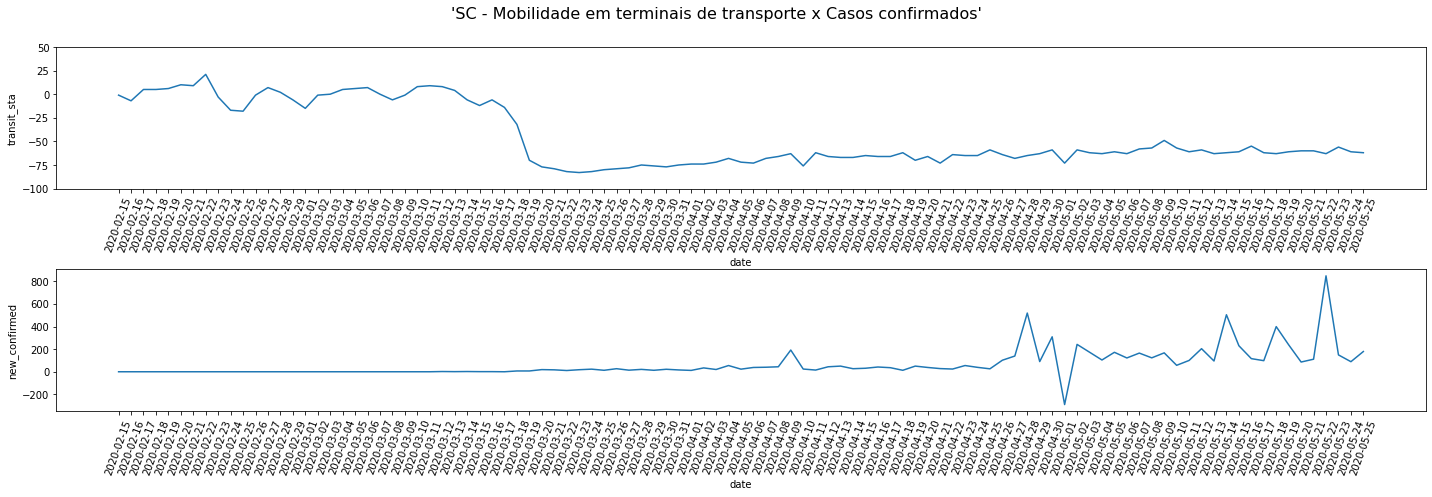

In [42]:
fig, ax =plt.subplots(2,1)
fig.set_size_inches(20,7)

sns.lineplot(x='date', y='transit_sta', data=sc, ax=ax[0])
sns.lineplot(x='date', y='new_confirmed', data=sc, ax=ax[1])
ax[0].set_ylim(-100, 50)
x = ax[1].set_xticklabels(labels=corr['date'].unique(), rotation=70)
y = ax[0].set_xticklabels(labels=corr['date'].unique(), rotation=70)

fig.tight_layout()
fig.suptitle("'SC - Mobilidade em terminais de transporte x Casos confirmados'", fontsize=16)
fig.subplots_adjust(top=0.9)



---

# **Construção e testes de modelos e Forecasts**

In [0]:
from statsmodels.tsa.arima_model import ARIMA

casosf = corr.drop('new_deaths', axis=1)
obitosf = corr.drop('new_confirmed', axis=1)



---

**ARIMA - Casos Brasil**

Em TimeSeries, um modelo recorrente para forecast é o ARIMA (AutoRegressive Integrated Moving Average) - vamos ver como ele se comporta no forecast para novos casos.

Fonte - https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [0]:
casosbr = casosf.groupby('date').sum().reset_index()
obitosbr = obitosf.groupby('date').sum().reset_index()
#casosbr['date'] = pd.to_datetime(casosbr['date'])

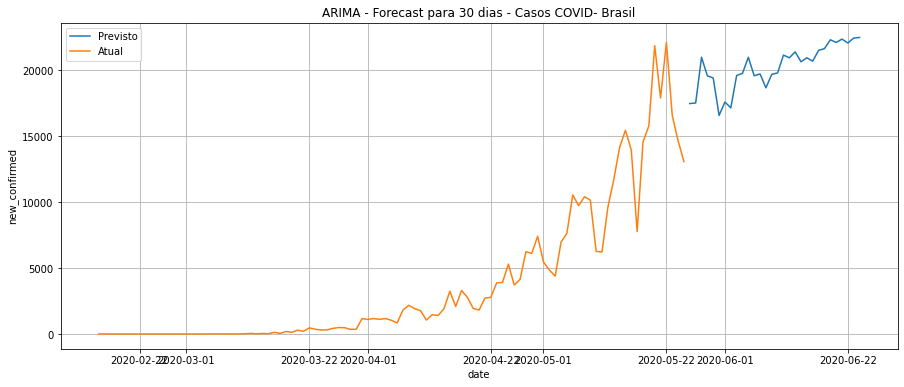

In [45]:
import datetime

arima = ARIMA(casosbr['new_confirmed'], order=(5, 1, 0))
arim_fit = arima.fit(trend='c', full_output=True, disp=True)
forecast = arim_fit.forecast(steps= 30)
pred = list(forecast[0])

start_date = pd.to_datetime(casosbr['date'].max())
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date


plt.figure(figsize= (15,6))
plt.ylabel('Total cases')
plt.title("ARIMA - Forecast para 30 dias - Casos COVID- Brasil")

sns.lineplot(y= pred, x= prediction_dates, label = 'Previsto');
sns.lineplot(y=casosbr['new_confirmed'],x=pd.to_datetime(casosbr['date']),label = 'Atual');
plt.grid(b=True)
plt.legend();

Parece ter seguido simplesmente a linha de tendência, adicionando algum ruido ou sazonalide observado no treinamento do modelo que se dissipa para o fim da previsão. Se alterarmos a previsão para 60 dias percebemos a total dissipação do ruído, restando simplesmente uma linha de tendência ascendente, não podemos observar um platô ou início de uma descendente.



---


**SARIMAX - Casos Brasil**

Em problemas de séries temporais onde pode ser observado algum tipo de sazonalidade, o modelo SARIMAX (Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors) também deve ser considerado.
O fato de a maioria das secretarias não reportarem os casos observados nos finais de semana faz com que exista um pico de novos casos associados às segundas-feiras. Isso demonstra um fator de sazonalidade que pode ser decomposto usando o modelo SARIMAX, provavelmente permitindo uma melhor previsão.
Fontes:
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
* https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

Parecido com o Elbow Method utilizado em alguns modelos de machine learning, o que faremos abaixo é tentar automatizar a execução do modelo SARIMAX buscando a melhor combinação de hiper-paramentros. É utilizado o AIC (Akaike Information Criterion) que avalia a adequação do modelo e sua complexidade, nesse sentido, é buscado o menor AIC que representará um modelo bem adequado aos dados utilizados e com a menor complexidade observada entre os parametros.



In [46]:
import warnings
import itertools
import statsmodels.api as sm

warnings.filterwarnings("ignore") # specify to ignore warning messages

# Define the p, d and q parameters to take any value between 0 and 2 - Same as ARIMA
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

sardf = casosbr[['date','new_confirmed']]
sardf['date'] = pd.to_datetime(sardf['date'])
sardf.set_index('date', inplace=True)
params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sardf,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            params.append(['ARIMA{} x SeasonalParams{} - AIC:{}'.format(param, param_seasonal, results.aic), results.aic])
        except:
            continue

df = pd.DataFrame(params)
df[df[1] == df[1].min()][0].values

array(['ARIMA(1, 1, 1) x SeasonalParams(1, 1, 1, 12) - AIC:1328.3054324844172'],
      dtype=object)

O melhor conjunto de hiper-parâmetros para este modelo SARIMAX, como verificado pelo metodo acima é (1, 1, 1) x (1, 1, 1, 12). Vamos criar esse modelo.


In [0]:
mod = sm.tsa.statespace.SARIMAX(sardf,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2020-05-10'), dynamic=False)
pred_ci = pred.conf_int()

No grafico abaixo, faremos um teste de previsão, utilizando o modelo para prever um periodo onde já temos observaçoes, dessa maneira conseguiremos calcular o MSE (erro quadrático médio) para ter uma ideia da qualidade das previsões que o modelo está apto a criar.

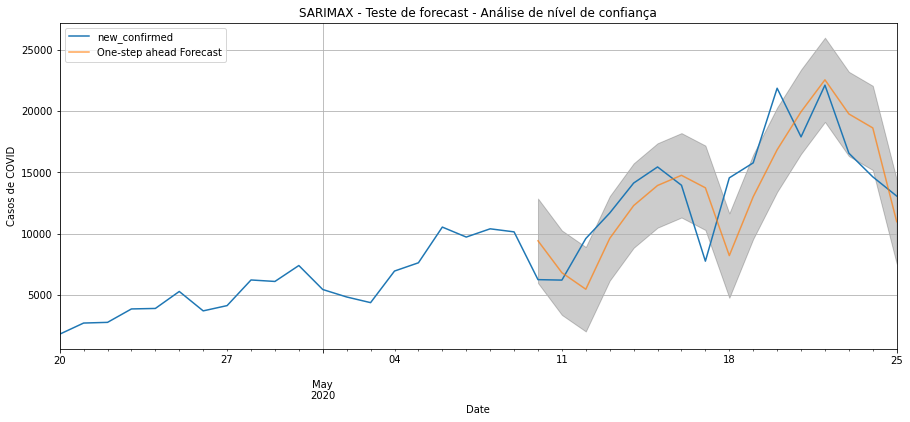

In [49]:
ax = sardf['2020-04-20':].plot(label='observed', figsize= (15,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title("SARIMAX - Teste de forecast - Análise de nível de confiança")
ax.set_xlabel('Date')
ax.set_ylabel('Casos de COVID')
plt.legend(loc = 'upper left')
plt.grid(b=True)
plt.show()

A partir dessa previsão de testes percebemos que existe um alto erro associado a previsão. Tambem podemos ver abaixo que o MSE (erro quadrático médio) está bastante alto. Apesar disso, vamos seguir com a previsão.

In [50]:
y_forecasted = pred.predicted_mean
y_truth = sardf['2020-05-20':].values[0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {} - MSE.Sqrt = {}'.format(round(mse, 2), round(math.sqrt(mse), 2)))

MSE 93523787.45 - MSE.Sqrt = 9670.77


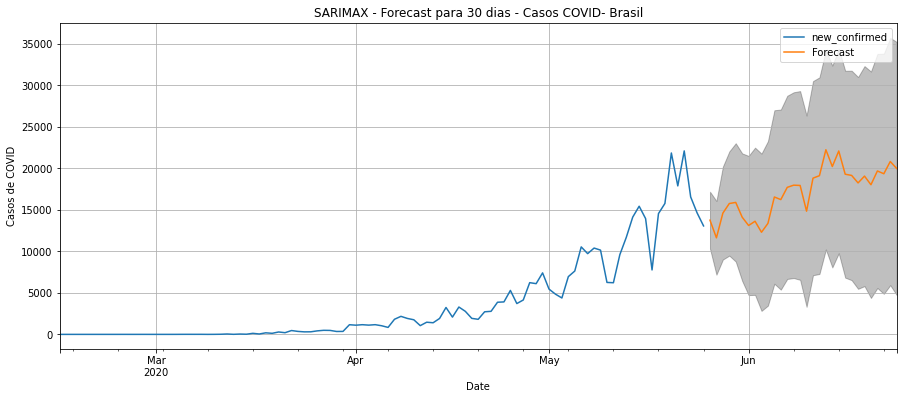

In [51]:
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = sardf.plot(label='observed', figsize=(15,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Casos de COVID')
plt.title("SARIMAX - Forecast para 30 dias - Casos COVID- Brasil")
plt.grid(b=True)
plt.legend()
plt.show()

Por fim, a previsão feita a partir do modelo SARIMAX simples, parece ter capturado um pouco melhor as tendências e curvas do que o modelo ARIMA, mas ainda assim, possui um grau de confiança bastante baixo. Apesar disso, mesmo projetando para um período de 60 dias, observamos que a tendência de alta é mantida.

**SARIMAX - casos Brasil com variável exógena de óbitos**

O modelo SARIMAX pode receber uma variável "exógena" e utilizá-la no treinamento e previsão, poderíamos criar um índice a partir dos dados de mobilidade ou até mesmo utilizar a quantidade de óbitos e verificar como o modelo se comporta.

In [52]:
import warnings
import itertools
import statsmodels.api as sm

# Define the p, d and q parameters to take any value between 0 and 2 - Same as ARIMA
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

sardf = casosbr[['date','new_confirmed']]
sardf['date'] = pd.to_datetime(sardf['date'])
sardf.set_index('date', inplace=True)

obtdf = obitosbr[['date','new_deaths']]
obtdf['date'] = pd.to_datetime(obtdf['date'])
obtdf.set_index('date', inplace=True)

params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_exog = sm.tsa.statespace.SARIMAX(sardf, exog=obtdf,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod_exog.fit()
            params.append(['ARIMA{} x SeasonalParams{} - AIC:{}'.format(param, param_seasonal, results.aic), results.aic])
        except:
            continue

df = pd.DataFrame(params)
df[df[1] == df[1].min()][0].values

array(['ARIMA(1, 1, 1) x SeasonalParams(1, 1, 1, 12) - AIC:1257.8034858055375'],
      dtype=object)

Ao utilizarmos uma variável exógena, com os dados de óbitos por dia, temos um AIC um pouco menor, indicando uma mudança positiva, apesar de pequena. Vamos seguir com a criação do modelo e os testes de previsão.

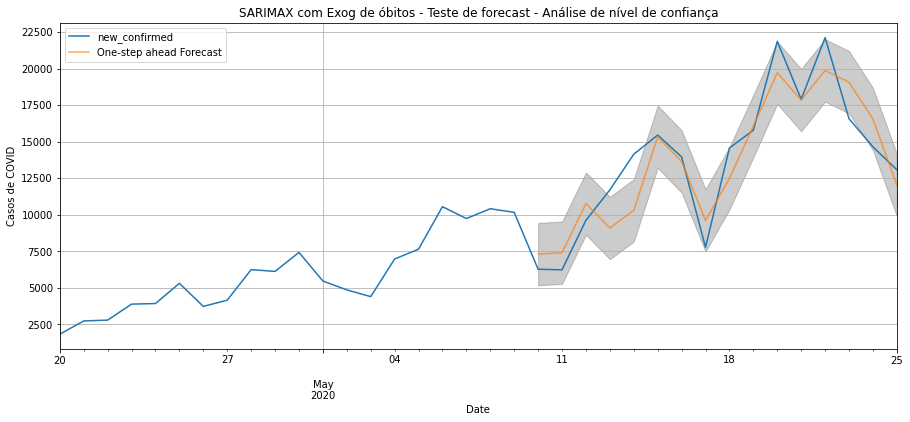

In [53]:
mod_exog = sm.tsa.statespace.SARIMAX(sardf, exog=obtdf,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod_exog.fit()
pred = results.get_prediction(start=pd.to_datetime('2020-05-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = sardf['2020-04-20':].plot(label='observed', figsize= (15,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title("SARIMAX com Exog de óbitos - Teste de forecast - Análise de nível de confiança")
ax.set_xlabel('Date')
ax.set_ylabel('Casos de COVID')
plt.legend()
plt.grid(b=True)
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = sardf['2020-05-20':].values[0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {} - MSE.Sqrt = {}'.format(round(mse, 2), round(math.sqrt(mse), 2)))

MSE 86351393.8 - MSE.Sqrt = 9292.55


Apesar de um um gráfico um pouco mais assertivo e um MSE pouco menor do que o observado no primeiro modelo sem a variável de obitos como exógena, o erro quadrático continua grande, uma incerteza de  mais de 9000 casos para cada ponto de previsão.

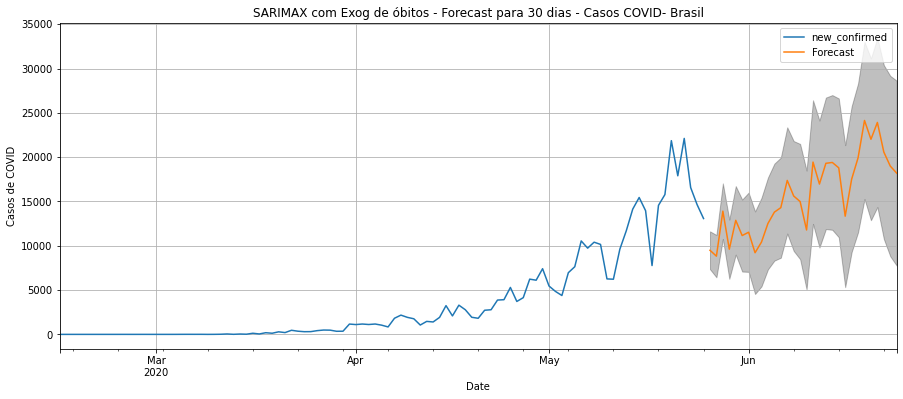

In [55]:
pred_uc = results.get_forecast(steps=30, exog=obtdf[-30:])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = sardf.plot(label='observed', figsize=(15,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Casos de COVID')
plt.title("SARIMAX com Exog de óbitos - Forecast para 30 dias - Casos COVID- Brasil")
plt.grid(b=True)
plt.legend()
plt.show()

A previsão parece um pouco mais compacta devido ao maior grau de confiança. Apenas para efeito de testes de predição, os casos de óbitos (variável exógena do modelo) tiveram suas últimas ocorrências repetidas pois o modelo SARIMAX com Exog precisa que essa variável extra acompanhe os dados previstos. (Ponto de melhoria seria utilizar o próprio modelo para prever a variável exógena).

**SARIMAX - casos Brasil com variável exógena da mobilidade média**

Para esse cenário, criamos uma variavel média de mobilidade a partir das variáveis de mobilidade do dataset do Google e vamos utilizar essa média como variável exógena no modelo SARIMAX


In [0]:
casosbr['avg'] = casosbr[['retail', 'groc_pharm', 'parks', 'transit_sta', 'work', 'resid']].mean(axis=1)

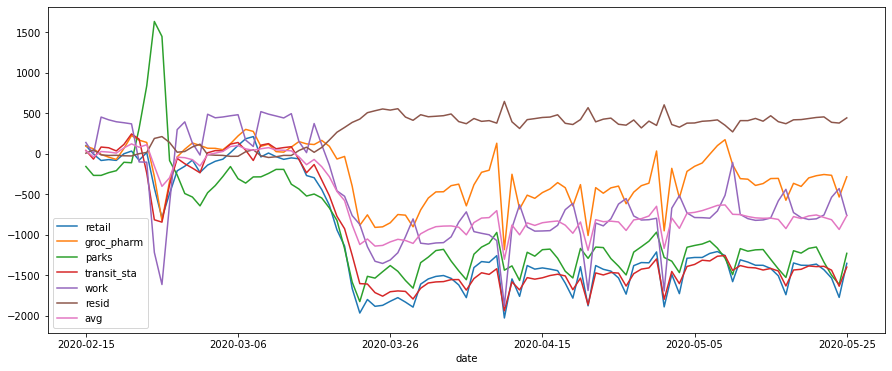

In [57]:
casosbr.drop('new_confirmed', axis=1).plot(x='date', figsize=(15,6))

In [58]:
import warnings
import itertools
import statsmodels.api as sm

# Define the p, d and q parameters to take any value between 0 and 2 - Same as ARIMA
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

sardf = casosbr[['date','new_confirmed']]
sardf['date'] = pd.to_datetime(sardf['date'])
sardf.set_index('date', inplace=True)

mobavg = casosbr[['date','avg']]
mobavg['date'] = pd.to_datetime(mobavg['date'])
mobavg.set_index('date', inplace=True)

params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_exog = sm.tsa.statespace.SARIMAX(sardf, exog=mobavg,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod_exog.fit()
            params.append(['ARIMA{} x SeasonalParams{} - AIC:{}'.format(param, param_seasonal, results.aic), results.aic])
        except:
            continue

df = pd.DataFrame(params)
df[df[1] == df[1].min()][0].values

array(['ARIMA(1, 1, 1) x SeasonalParams(1, 1, 1, 12) - AIC:1323.4558257974663'],
      dtype=object)

Hiper-parâmetros iguais e valor de AIC similar aos outros dois modelos. Vamos verificar o MSE e seguir com a previsão. 

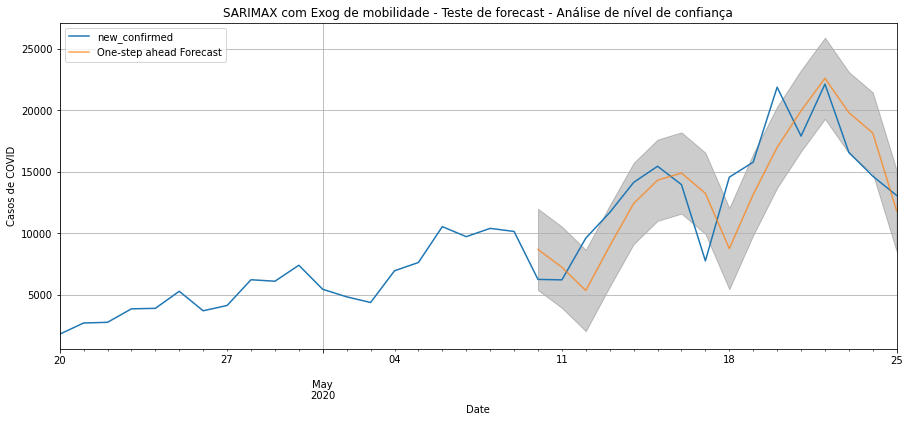

In [59]:
mod_mob = sm.tsa.statespace.SARIMAX(sardf, exog=mobavg,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod_mob.fit()
pred = results.get_prediction(start=pd.to_datetime('2020-05-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = sardf['2020-04-20':].plot(label='observed', figsize= (15,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title("SARIMAX com Exog de mobilidade - Teste de forecast - Análise de nível de confiança")
ax.set_xlabel('Date')
ax.set_ylabel('Casos de COVID')
plt.legend(loc = 'upper left')
plt.grid(b=True)
plt.show()

In [60]:
y_forecasted = pred.predicted_mean
y_truth = sardf['2020-05-20':].values[0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {} - MSE.Sqrt = {}'.format(round(mse, 2), round(math.sqrt(mse), 2)))

MSE 93050169.26 - MSE.Sqrt = 9646.25


O erro quadrático ficou entre os dois últimos modelos, e o gráfico abaixo tambem apresentou pouca melhora.
Esses resultados fazem sentido pois, como pudemos observar nas análises de correlações, a variável de número de óbitos tinha uma correlação um pouco maior com a variável de casos do que as variáveis de mobilidade.

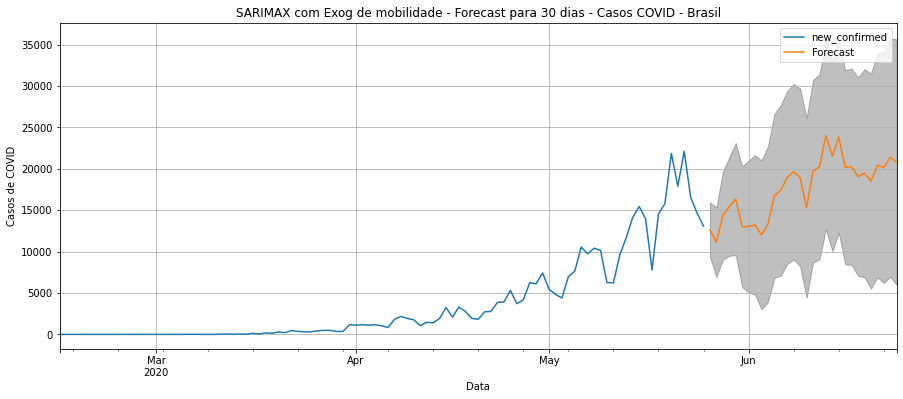

In [61]:
pred_uc = results.get_forecast(steps=30, exog=mobavg[-30:])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = sardf.plot(label='observed', figsize=(15,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID')
plt.title("SARIMAX com Exog de mobilidade - Forecast para 30 dias - Casos COVID - Brasil")
plt.grid(b=True)
plt.legend()
plt.show()



---

# **Previsão de casos Brasil - SARIMAX com váriavel exógena de óbitos**

De acordo com os testes feitos acima, o melhor modelo testado foi o SARIMAX (1, 1, 1) x (1, 1, 1. 12), com uma variável exógena de óbitos. A previsão para 30 dias está abaixo.

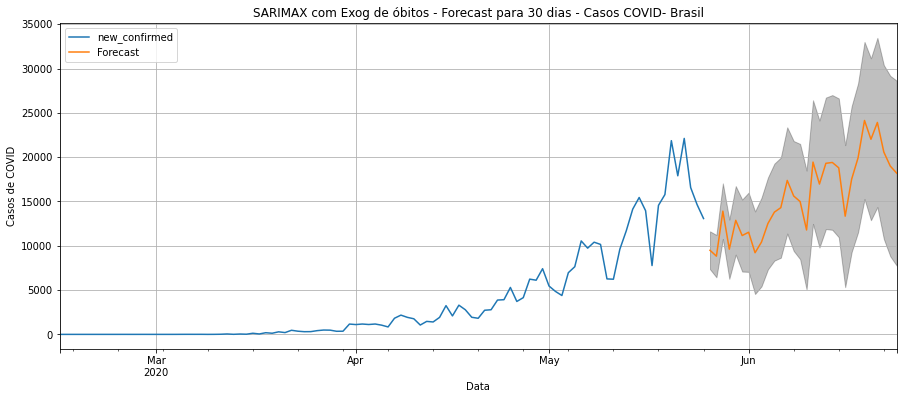

In [62]:
mod_exog = sm.tsa.statespace.SARIMAX(sardf, exog=obtdf,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod_exog.fit()
pred_uc = results.get_forecast(steps=30, exog=obtdf[-30:])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = sardf.plot(figsize=(15,6), label='Casos observados')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID')
plt.title("SARIMAX com Exog de óbitos - Forecast para 30 dias - Casos COVID- Brasil")
plt.grid(b=True)
plt.legend(loc='upper left')
plt.show()

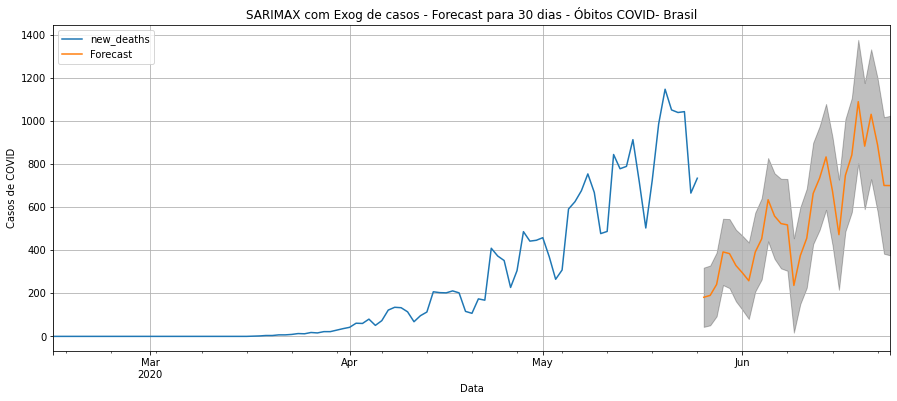

In [63]:
mod_exog = sm.tsa.statespace.SARIMAX(obtdf, exog=sardf,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod_exog.fit()
pred_uc = results.get_forecast(steps=30, exog=sardf[-30:])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = obtdf.plot(figsize=(15,6), label='Casos observados')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID')
plt.title("SARIMAX com Exog de casos - Forecast para 30 dias - Óbitos COVID- Brasil")
plt.grid(b=True)
plt.legend(loc='upper left')
plt.show()



---


# **Considerações finais**

No cenário atual de pandemia mundial onde um dos únicos métodos de “controle” pandêmico é o isolamento social, dados de mobilidade urbana viraram uma incrível ferramenta de informação. Desconhecia esse dataset do Google e foi muito interessante trabalhar com ele ao mesmo tempo que é intrigante perceber a partir dessa pequena amostra pública o poder de informação através de dados geográficos que eles têm alcance.

Já vinha trabalhando com o dataset da iniciativa Brasil.io em uma análise dos casos de covid-19 mais focado no estado de SC (https://nbviewer.jupyter.org/github/OckerGui/DataScience/blob/master/Covid_SC_Brazil.ipynb). O Brasil.io já vinha fazendo um trabalho surpreendente de coleta, processamento e até zeladoria de dados e acabaram por ganhar uma especial importância nesses 3 últimos dias onde temos uma verdadeira batalha de informação acontecendo entre instituições governamentais e o interesse público.

Foi bastante instigante poder trabalhar na correlação entre estes datasets, percebendo suas interações e extraindo novas informações.

Infelizmente, a partir da correlação completa entre ambos os datasets, pouca informação realmente pôde ser extraída e utilizada em cenários de forecast, como comentei nas considerações sobre a parte de correlação. Entretanto, apesar de estar terminando essa análise para o desafio, continuarei trabalhando com ambos os datasets, filtrando e aplicando um pouco mais de ajuste fino nas correlações, buscando novas informações.

Quanto as previsões, havia trabalhado muito pouco com séries temporais e no fim, foi o meu principal desafio durante esse teste. Os modelos clássicos de previsão para séries temporais que foram os que mais consegui focar, se estruturam muito na decomposição de padrões, ruidos, percepção de sazonalidade entre outros componentes importante para cenários classicos como forecast de vendas e ações, e pelo que consegui avaliar não são muito úteis no cenário tão complexo e cheio de novas variáveis (taxa de transmissão, pico epidemiológico, falta de testes etc.) e ruídos de informação como o da atual pandemia.

“Próximas atividades”
* Refinamento da correlação, utilizando como data de corte os 10 primeiros casos ou o primeiro óbito.
* Estudo e aplicação de modelos mais focados no forecast epidemiológicos, que considera novas variáveis.
* Estudo e aplicação de métodos de forecast  para series temporais usando Machine Learning, especialmente CNNs e MLPs.

Muito obrigado pela oportunidade.




---

---

---

